# Analyzing linear SVM vs penalty parameter c 
# Case 1 : Linear separable data

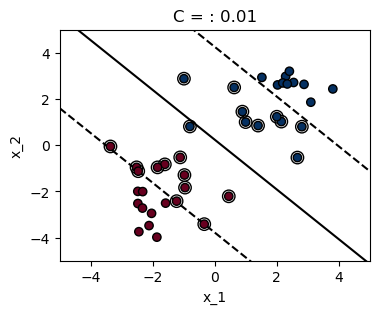

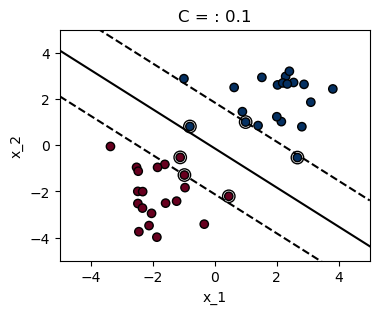

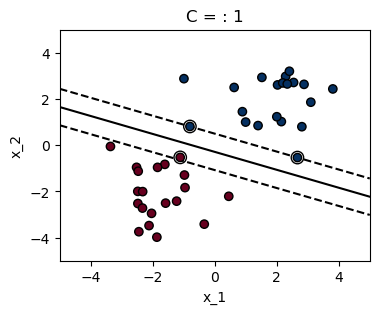

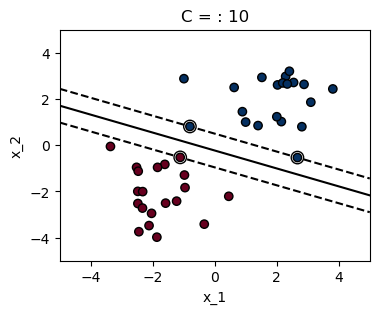

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm


X = np.vstack((np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]))
Y = [0] * 20 + [1] * 20

for idx,penalty in enumerate([0.01, 0.1, 1, 10]):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # compute the separating hyperplane: w_1 x_1 +w_2 x_2 + b = 0 -> x_2 = -w_1/w_2 x_1 - b/w_2
    w = clf.coef_[0]
    b = (clf.intercept_[0]) / w[1]
    xx = np.linspace(-5, 5)
    yy = -w[0] / w[1] * xx - b

    #compute the margin hyperplane: w_1 x_1 +w_2 x_2 + b = +- 1 -> x_2 = -w_1/w_2 x_1 - b/w_2 +- 1/w_2
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = -w[0] / w[1] * xx - b - 1 / w[1]
    yy_up = -w[0] / w[1] * xx - b + 1 / w[1]

    # plot separating hyperplane, samples and support vectors
    plt.figure(idx+1, figsize=(4, 3))
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )
    plt.axis("tight")
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title(f'C = : {penalty}')

plt.show()

# Analyzing linear SVM vs penalty parameter c 
# Case 2 : Linear separable data with outlier

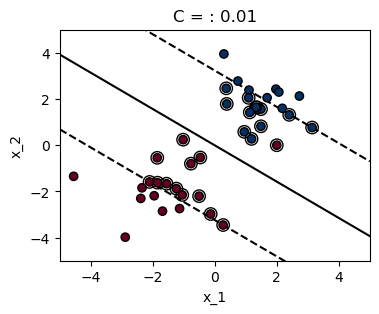

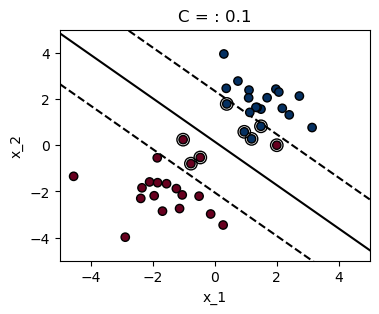

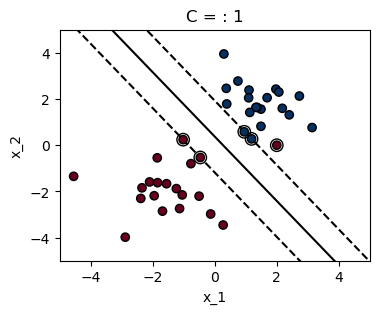

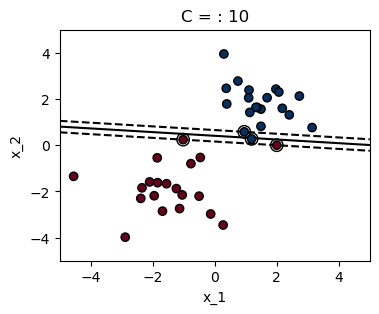

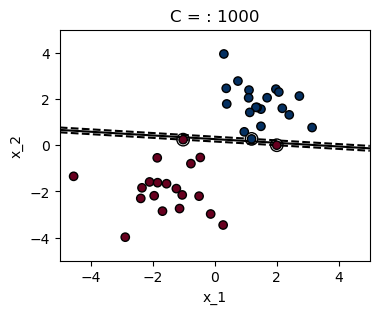

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.datasets import make_classification, make_blobs

np.random.seed(0)
X = np.vstack((np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]))
X[0,:]= np.array([2,0]) #our outlier!!!!
Y = [0] * 20 + [1] * 20


for idx,penalty in enumerate([0.01, 0.1, 1, 10, 1000]):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # compute the separating hyperplane: w_1 x_1 +w_2 x_2 + b = 0 -> x_2 = -w_1/w_2 x_1 - b/w_2
    w = clf.coef_[0]
    b = (clf.intercept_[0]) / w[1]
    xx = np.linspace(-5, 5)
    yy = -w[0] / w[1] * xx - b

    #compute the margin hyperplane: w_1 x_1 +w_2 x_2 + b = +- 1 -> x_2 = -w_1/w_2 x_1 - b/w_2 +- 1/w_2
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = -w[0] / w[1] * xx - b - 1 / w[1]
    yy_up = -w[0] / w[1] * xx - b + 1 / w[1]

    # plot separating hyperplane, samples and support vectors
    plt.figure(idx+1, figsize=(4, 3))
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )
    plt.axis("tight")
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title(f'C = : {penalty}')

plt.show()

# Analyzing SVM vs penalty parameter c
# Case 3 : Nonliear separation

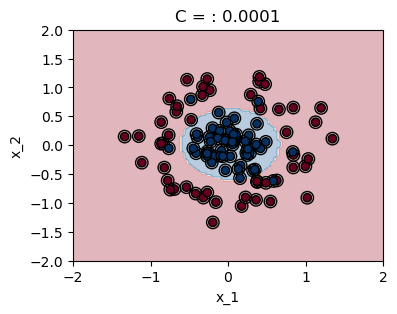

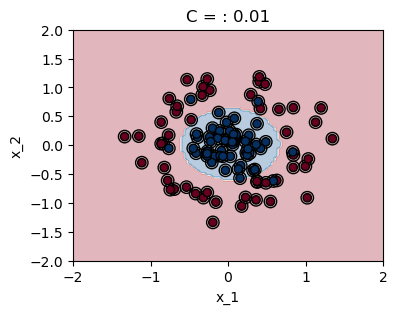

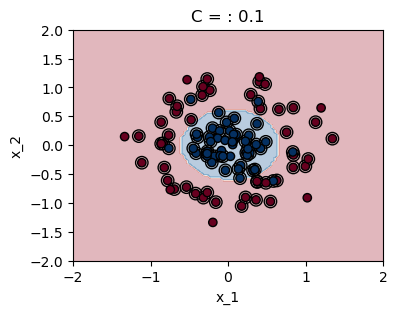

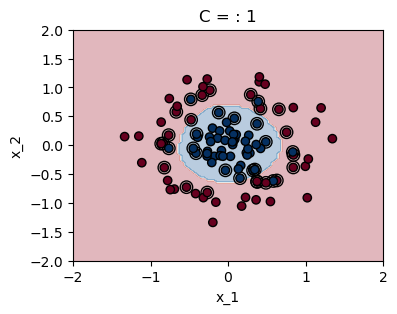

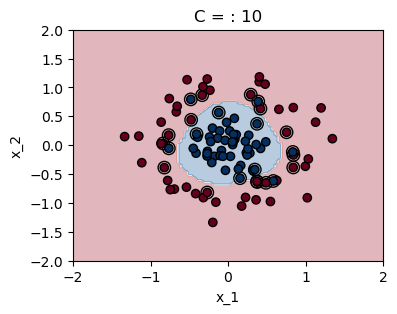

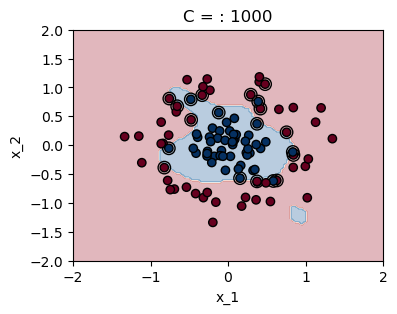

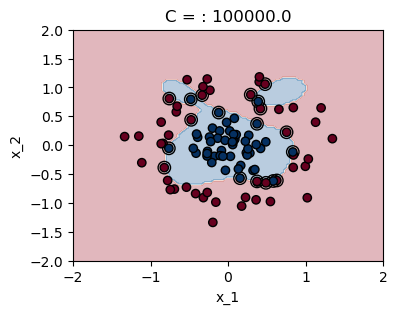

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.datasets import make_moons, make_circles

np.random.seed(42)
#X,Y = make_moons(n_samples= 80, noise=0.3)
X,Y = make_circles(n_samples=100,
    noise=0.2,
    factor=0.3
)

for idx,penalty in enumerate([0.0001, 0.01, 0.1, 1, 10, 1000, 1e5]):

    clf = svm.SVC(kernel="rbf", C=penalty,) #check degree 30 as well
    clf.fit(X, Y)

    xx1, xx2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
    plt.figure(idx+1, figsize=(4, 3))
    plt.contourf(xx1, xx2, clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape),
             alpha = 0.3, cmap=cm.get_cmap("RdBu"))

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )
    plt.axis("tight")
    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title(f'C = : {penalty}')

plt.show()